In [10]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import re

import kplr

In [11]:
def all_LCdata(koi, mask_bad=True):
    df = pd.DataFrame()
    for lc in koi.get_light_curves():
        if re.search('_llc\.fits', lc.filename):
            newdf = lc.data
            newdf['PDCSAP_FLUX'] /= newdf['PDCSAP_FLUX'].mean()
            df = pd.concat([df, newdf])
            
    if mask_bad:
        ok = np.isfinite(df['PDCSAP_FLUX']) & (df['SAP_QUALITY']==0)
    return df[ok]

In [12]:
client = kplr.API()
koi = client.koi(1422.01)
lcdata = all_LCdata(koi)

In [13]:
lcdata.columns

Index([u'TIME', u'TIMECORR', u'CADENCENO', u'SAP_FLUX', u'SAP_FLUX_ERR', u'SAP_BKG', u'SAP_BKG_ERR', u'PDCSAP_FLUX', u'PDCSAP_FLUX_ERR', u'SAP_QUALITY', u'PSF_CENTR1', u'PSF_CENTR1_ERR', u'PSF_CENTR2', u'PSF_CENTR2_ERR', u'MOM_CENTR1', u'MOM_CENTR1_ERR', u'MOM_CENTR2', u'MOM_CENTR2_ERR', u'POS_CORR1', u'POS_CORR2'], dtype='object')

In [23]:
period = koi.koi_period
epoch = koi.koi_time0bk
duration = koi.koi_duration
tfold = (lcdata['TIME'] + period/2 - epoch) % period - (period/2)

close = np.absolute(tfold) < 3*(duration/24)

flux = lcdata['PDCSAP_FLUX']
e_flux = lcdata['PDCSAP_FLUX_ERR']

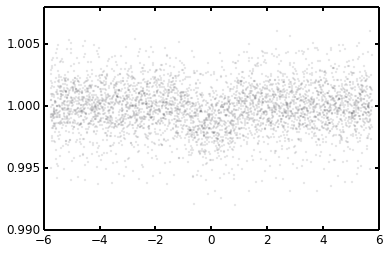

In [31]:
plt.plot(tfold[close]*24, flux[close], 'o', ms=0.2, alpha=0.35);

In [7]:
import numpy as np
import transit
from astropy import constants as const

RSUN = const.R_sun.cgs.value
MSUN = const.M_sun.cgs.value

def density(m, r):
    """m, r in solar 
    """
    return 0.75 * m*MSUN / (np.pi * (r*RSUN)**3)

In [3]:
star = transit.Central(mass=0.5, radius=0.48)

In [4]:
star.density

6.38128161332279

In [9]:
star.density = 5.105
star.mass

0.3999980183715619

In [ ]:
from transit import Central, Body

class TransitModel(object):
    def __init__(self, time, flux, flux_err=0.0001,
                 n_planets=1):
        self.time = time
        self.flux = flux
        self.flux_err = flux_err
        
        self.n_planets = n_planets
        
    def lnlike(self, p):
        """
        params: [rhostar, u1, u2, dilution, period, epoch, b, rprs, e, w]
        """
        rhostar, u1, u2, dilution = p[:4]
        
        central = Central(u1=u1, u2=u2)
        central.density = rhostar
        
        tot = 0
        for i in range(self.n_planets):
            period, epoch, b, rprs, e, w = p[4+i*6:10+i*6]
            r = central.radius * rprs
            body = Body(flux=0, r=r, mass=0, period=p, t0=epoch,
                       e=e, omega=omega, b=b)
            
        
        